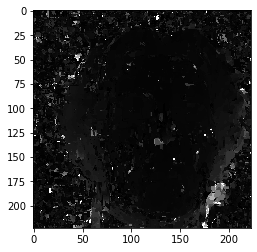

--- 1226.6653521060944 seconds ---


In [12]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import time
import multiprocessing as mp

start_time = time.time()

img1 = cv2.imread('CosimaHeadStereoPairMid11.png',0)
img2 = cv2.imread('CosimaHeadStereoPairMid22.png',0)

#start = ((img1.shape[0])/4)
#end = start*3

ss = 15
p1 = 3
value = 20
start = value
end = img1.shape[0]-value

def work(xx,yy):
    
    distlist = []
    reslist = []
    mindistlist = []
    crp1 = img1[yy-p1:yy+p1+1, xx-p1:xx+p1+1]
    
    for k in range(abs(ss-xx),abs(ss+xx)+1):
        for l in range(abs(ss-yy),abs(ss+yy)+1):
            
            crp2 = img2[l-p1:l+p1+1, k-p1:k+p1+1]
            #res = cv2.matchTemplate(crp1,crp2,cv2.TM_SQDIFF)
            #res = cv2.matchTemplate(crp1,crp2,cv2.TM_SQDIFF_NORMED)
            #res = cv2.matchTemplate(crp1,crp2,cv2.TM_CCOEFF)
            res = cv2.matchTemplate(crp1,crp2,cv2.TM_CCOEFF_NORMED)
            #res = cv2.matchTemplate(crp1,crp2,cv2.TM_CCORR)
            #res = cv2.matchTemplate(crp1,crp2,cv2.TM_CCORR_NORMED)
            
            ress = res[0][0]
            reslist.append(ress)
            dist = math.sqrt(((xx-k)**2)+((yy-l)**2))
            distlist.append(dist)
            
    for i in range(0,len(reslist)):
        #if reslist[i] == min(reslist):
        if reslist[i] == max(reslist):
            mindistlist.append(distlist[i])
            
    mindist = min(mindistlist)
    #if len(mindistlist) != 1:
        #print(len(mindistlist))
    
    del distlist[:]
    del reslist[:]
    del mindistlist[:]
    
    if mindist != 0:
        mindistt = (1/mindist)
    elif mindist == 0:
        mindistt = 1
    
    return mindistt
            

dlist = []
for i in range(start,end):
    for j in range(start,end):
        dlist.append((j,i))
        
pool = mp.Pool(mp.cpu_count())

output = pool.starmap(work, dlist)

pool.close()
    
del dlist[:]

out = np.asarray(output)

lz = len(out)
lz = int(math.sqrt(lz))

outs = np.reshape(out, (lz, lz))

outz = np.array(outs)
#outz = cv2.GaussianBlur(outz,(3,3),0)
#plt.imsave("astr.png",outz,cmap="gray")
plt.imshow(outz,cmap="gray")
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))



In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import time

img1 = cv2.imread('41617462osStereo1[1].tif',0)

print(img1.shape[0])

480


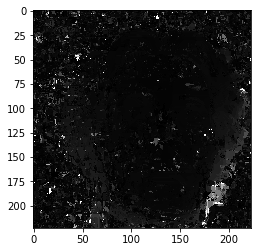

--- 886.1859445571899 seconds ---


In [13]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import time
import multiprocessing as mp

start_time = time.time()

img1 = cv2.imread('CosimaHeadStereoPairMid11.png',0)
img2 = cv2.imread('CosimaHeadStereoPairMid22.png',0)

#start = ((img1.shape[0])/4)
#end = start*3

ss = 15
p1 = 3
value = 20
start = value
end = img1.shape[0]-value
pyset = set()

def work(xx,yy):
    
    distlist = []
    reslist = []
    mindistlist = []
    pointslist = []
    pzlist = []
    crp1 = img1[yy-p1:yy+p1+1, xx-p1:xx+p1+1]
    
    for k in range(abs(ss-xx),abs(ss+xx)+1):
        for l in range(abs(ss-yy),abs(ss+yy)+1):
            if (k,l) not in pyset:
                crp2 = img2[l-p1:l+p1+1, k-p1:k+p1+1]
                #res = cv2.matchTemplate(crp1,crp2,cv2.TM_SQDIFF)
                #res = cv2.matchTemplate(crp1,crp2,cv2.TM_SQDIFF_NORMED)
                #res = cv2.matchTemplate(crp1,crp2,cv2.TM_CCOEFF)
                res = cv2.matchTemplate(crp1,crp2,cv2.TM_CCOEFF_NORMED)
                #res = cv2.matchTemplate(crp1,crp2,cv2.TM_CCORR)
                #res = cv2.matchTemplate(crp1,crp2,cv2.TM_CCORR_NORMED)
                ress = res[0][0]
                reslist.append(ress)
                dist = math.sqrt(((xx-k)**2)+((yy-l)**2))
                distlist.append(dist)
                pointslist.append((k,l))
            
    for i in range(0,len(reslist)):
        #if reslist[i] == min(reslist):
        if reslist[i] == max(reslist):
            mindistlist.append(distlist[i])
            pzlist.append(pointslist[i])
            
    mindist = min(mindistlist)
    idx = mindistlist.index(mindist)
    point = pzlist[idx]
    pyset.add(point)
    #if len(mindistlist) != 1:
        #print(len(mindistlist))
    
    del distlist[:]
    del reslist[:]
    del mindistlist[:]
    del pointslist[:]
    del pzlist[:]
    
    if mindist != 0:
        mindistt = (1/mindist)
    elif mindist == 0:
        mindistt = 1
    
    return mindistt
            

dlist = []
for i in range(start,end):
    for j in range(start,end):
        dlist.append((j,i))
        
pool = mp.Pool(mp.cpu_count())

output = pool.starmap(work, dlist)

pool.close()
    
del dlist[:]

out = np.asarray(output)

lz = len(out)
lz = int(math.sqrt(lz))

outs = np.reshape(out, (lz, lz))

outz = np.array(outs)
#outz = cv2.GaussianBlur(outz,(3,3),0)
#plt.imsave("bstr.png",outz,cmap="gray")
plt.imshow(outz,cmap="gray")
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))



<ipython-input-7-3d5b3358e280>:98: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(outz,cmap="gray")
<ipython-input-7-3d5b3358e280>:98: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(outz,cmap="gray")


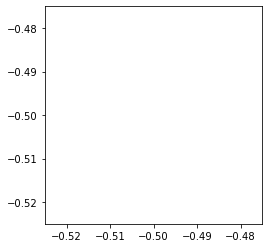

--- 93.28576588630676 seconds ---


In [7]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import time
#import multiprocessing as mp

start_time = time.time()

img1 = cv2.imread('stereo-parallel-smaller1.tif',0)
img2 = cv2.imread('stereo-parallel-smaller2.tif',0)

#start = ((img1.shape[0])/4)
#end = start*3

ss = 10
p1 = 4
start = 15
end = 165
pyset = set()

def work(xx,yy):
    
    distlist = []
    reslist = []
    mindistlist = []
    pointslist = []
    pzlist = []
    crp1 = img1[yy-p1:yy+p1+1, xx-p1:xx+p1+1]
    
    for k in range(abs(ss-xx),abs(ss+xx)+1):
        for l in range(abs(ss-yy),abs(ss+yy)+1):
            if (k,l) not in pyset:
                crp2 = img2[l-p1:l+p1+1, k-p1:k+p1+1]
                #res = cv2.matchTemplate(crp1,crp2,cv2.TM_SQDIFF)
                #res = cv2.matchTemplate(crp1,crp2,cv2.TM_SQDIFF_NORMED)
                #res = cv2.matchTemplate(crp1,crp2,cv2.TM_CCOEFF)
                res = cv2.matchTemplate(crp1,crp2,cv2.TM_CCOEFF_NORMED)
                #res = cv2.matchTemplate(crp1,crp2,cv2.TM_CCORR)
                #res = cv2.matchTemplate(crp1,crp2,cv2.TM_CCORR_NORMED)
                res = res[0][0]
                reslist.append(res)
                dist = math.sqrt(((xx-k)**2)+((yy-l)**2))
                distlist.append(dist)
                pointslist.append((k,l))
            
    for i in range(0,len(reslist)):
        #if reslist[i] == min(reslist):
        if reslist[i] == max(reslist):
            mindistlist.append(distlist[i])
            pzlist.append(pointslist[i])
            
    mindist = min(mindistlist)
    idx = mindistlist.index(mindist)
    point = pzlist[idx]
    pyset.add(point)
    #if len(mindistlist) != 1:
        #print(len(mindistlist))
    
    del distlist[:]
    del reslist[:]
    del mindistlist[:]
    del pointslist[:]
    del pzlist[:]
    
    if mindist != 0:
        mindist = (1/mindist)
    elif mindist == 0:
        mindist = 1
    
    return mindist
            

dlist = []
for i in range(start,end):
    for j in range(start,end):
        dlist.append(work(j,i))
        
#pool = mp.Pool(mp.cpu_count())

#output = pool.starmap(work, dlist)

#pool.close()
output = dlist
    
del dlist[:]

out = np.asarray(output)

lz = len(out)
lz = int(math.sqrt(lz))

outs = np.reshape(out, (lz, lz))

outz = np.array(outs)
#outz = cv2.GaussianBlur(outz,(3,3),0)
#plt.imsave("bstr.png",outz,cmap="gray")
plt.imshow(outz,cmap="gray")
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))



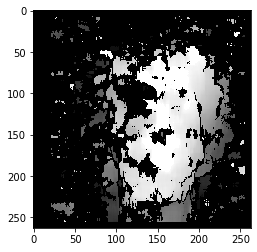

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

imgL = cv2.imread('CosimaHeadStereoPairMid11.png',0)
imgR = cv2.imread('CosimaHeadStereoPairMid22.png',0)

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()
    